In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv('NBAstats.csv')
dfSal = pd.read_csv('NBASalaries.csv')

In [44]:
df[['PlayerName', 'PlayerID']] = df['Player'].str.split('\\', expand=True)
dfSal[['PlayerName', 'PlayerID']] = dfSal['Player'].str.split('\\', expand=True)

In [45]:
df = df.groupby('PlayerID',sort=False).apply(lambda x: x if len(x)==1 else x.loc[x.Tm.eq('TOT')]).reset_index(drop=True)

In [46]:
df['PTS_Rank'] = df['PTS'].rank(ascending=False)
df['TRB_Rank'] = df['TRB'].rank(ascending=False)
df['AST_Rank'] = df['AST'].rank(ascending=False)
df['STL_Rank'] = df['STL'].rank(ascending=False)
df['BLK_Rank'] = df['BLK'].rank(ascending=False)
df['FG%_Rank'] = df['FG%'].rank(ascending=False)

In [47]:
dfSal['Salary2019-20'] = dfSal['Salary2019-20'].apply(lambda x: x.replace('$', ''))
dfSal['Salary2019-20'] = dfSal['Salary2019-20'].astype(float)

In [48]:
dfSal['Salary2019_Rank'] = dfSal['Salary2019-20'].rank(ascending=False)
dfSal['Salary2019Mil'] = (dfSal['Salary2019-20'] / 1000000)
dfSal.sort_values('Salary2019_Rank', inplace=True)

In [49]:
df['Overall_Rank'] = (df['PTS_Rank']
+ df['TRB_Rank'] + df['AST_Rank'] + df['STL_Rank']
+ df['BLK_Rank'] + df['FG%_Rank']).rank(ascending=True)


In [50]:
df.set_index(['PlayerID'])
dfSal.set_index(['PlayerID'])

,Rk,Player,Tm,Salary2019-20,Salary2020-21,Salary2021-22,Salary2022-23,Salary2023-24,Salary024-25,Signed Using,Guaranteed,PlayerName,Salary2019_Rank,Salary2019Mil
PlayerID,,,,,,,,,,,,,,
curryst01,1,Stephen Curry\curryst01,GSW,40231758.0,$43006362,$45780966,NaN,NaN,NaN,Bird Rights,$129019086,Stephen Curry,1.0,40.231758
paulch01,2,Chris Paul\paulch01,OKC,38506482.0,$41358814,$44211146,NaN,NaN,NaN,Bird Rights,$79865296,Chris Paul,2.0,38.506482
westbru01,3,Russell Westbrook\westbru01,HOU,38178000.0,$41006000,$43848000,$46662000,NaN,NaN,Bird Rights,$123032000,Russell Westbrook,3.0,38.178000
walljo01,4,John Wall\walljo01,WAS,37800000.0,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000,John Wall,4.5,37.800000
hardeja01,5,James Harden\hardeja01,HOU,37800000.0,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000,James Harden,4.5,37.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
howarwi01,541,William Howard\howarwi01,UTA,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,$50000,William Howard,542.5,0.050000
taylois01,542,Isaiah Taylor\taylois01,TOR,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,$50000,Isaiah Taylor,542.5,0.050000
lydonty01,543,Tyler Lydon\lydonty01,SAC,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,$50000,Tyler Lydon,542.5,0.050000


In [51]:
dfMerge = pd.merge(df, dfSal, on=['PlayerID', 'PlayerName'], suffixes=('_l', '_r'), how='left')

In [52]:
dfMerge.head(7)

,Rk_l,Player_l,Pos,Age,Tm_l,G,GS,MP,FG,FGA,...,Salary2019-20,Salary2020-21,Salary2021-22,Salary2022-23,Salary2023-24,Salary024-25,Signed Using,Guaranteed,Salary2019_Rank,Salary2019Mil
0,1,Steven Adams\adamsst01,C,26,OKC,58,58,27.0,4.5,7.6,...,25842697.0,$27528090,NaN,NaN,NaN,NaN,1st Round Pick,$53370787,41.5,25.842697
1,2,Bam Adebayo\adebaba01,PF,22,MIA,65,65,34.4,6.3,11.1,...,3454080.0,$5115492,NaN,NaN,NaN,NaN,1st Round Pick,$8569572,253.0,3.454080
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,...,26000000.0,$24000000,NaN,NaN,NaN,NaN,Cap Space,$50000000,40.0,26.000000
3,4,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,0,12.2,1.9,5.5,...,2964840.0,$3113160,$3261480,$5009633,NaN,NaN,1st Round Pick,$6078000,270.0,2.964840
4,5,Grayson Allen\allengr01,SG,24,MEM,30,0,16.6,2.6,5.9,...,2429400.0,$2545320,$4054695,NaN,NaN,NaN,1st Round Pick,$4974720,309.0,2.429400
5,6,Jarrett Allen\allenja01,C,21,BRK,64,58,25.7,4.2,6.5,...,2376840.0,$3909902,NaN,NaN,NaN,NaN,1st Round Pick,$6286742,312.0,2.376840
6,7,Kadeem Allen\allenka01,SG,27,NYK,10,0,11.7,1.9,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
dfMerge['Eff_Sal_Ratio'] = (dfMerge['Salary2019_Rank'] / dfMerge['Overall_Rank'])

In [54]:
dfMerge[['PlayerName', 'Salary2019_Rank', 'Overall_Rank', 'Eff_Sal_Ratio']]

,PlayerName,Salary2019_Rank,Overall_Rank,Eff_Sal_Ratio
0,Steven Adams,41.5,24.0,1.729167
1,Bam Adebayo,253.0,2.5,101.200000
2,LaMarcus Aldridge,40.0,26.0,1.538462
3,Nickeil Alexander-Walker,270.0,385.0,0.701299
4,Grayson Allen,309.0,369.5,0.836265
...,...,...,...,...
536,Thaddeus Young,98.0,102.0,0.960784
537,Trae Young,180.0,103.0,1.747573
538,Cody Zeller,87.0,96.0,0.906250
539,Ante Žižić,322.5,345.0,0.934783


In [55]:
dfMerge.sort_values('Overall_Rank', inplace=True)

In [56]:
dfMergeHead = dfMerge.head(10)

In [57]:
dfMergeHead[['PlayerName', 'Salary2019_Rank', 'Overall_Rank', 'Eff_Sal_Ratio']]

,PlayerName,Salary2019_Rank,Overall_Rank,Eff_Sal_Ratio
12,Giannis Antetokounmpo,41.5,1.0,41.500000
1,Bam Adebayo,253.0,2.5,101.200000
127,Anthony Davis,35.0,2.5,14.000000
461,Ben Simmons,148.0,4.0,37.000000
144,Andre Drummond,35.0,5.0,7.000000
269,Nikola Jokić,38.0,6.0,6.333333
485,Karl-Anthony Towns,32.5,7.0,4.642857
258,LeBron James,6.0,8.0,0.750000
304,Kawhi Leonard,12.5,9.0,1.388889
203,James Harden,4.5,10.0,0.450000


In [58]:
dfMergeHead

,Rk_l,Player_l,Pos,Age,Tm_l,G,GS,MP,FG,FGA,...,Salary2020-21,Salary2021-22,Salary2022-23,Salary2023-24,Salary024-25,Signed Using,Guaranteed,Salary2019_Rank,Salary2019Mil,Eff_Sal_Ratio
12,12,Giannis Antetokounmpo\antetgi01,PF,25,MIL,57,57,30.9,10.9,20.0,...,$27528090,NaN,NaN,NaN,NaN,1st Round Pick,$53370787,41.5,25.842697,41.500000
1,2,Bam Adebayo\adebaba01,PF,22,MIA,65,65,34.4,6.3,11.1,...,$5115492,NaN,NaN,NaN,NaN,1st Round Pick,$8569572,253.0,3.454080,101.200000
127,154,Anthony Davis\davisan02,PF,26,LAL,55,55,34.3,9.2,18.1,...,$28751775,NaN,NaN,NaN,NaN,1st Round Pick,$27093019,35.0,27.093019,14.000000
461,530,Ben Simmons\simmobe01,PG,23,PHI,54,54,35.7,6.7,11.4,...,$29250000,$31590000,$33930000,$36270000,$38610000,1st Round pick,$177763930,148.0,8.113930,37.000000
144,175,Andre Drummond\drumman01,C,26,TOT,57,56,33.0,7.3,13.8,...,$28751775,NaN,NaN,NaN,NaN,Cap Space,$27093019,35.0,27.093019,7.000000
269,321,Nikola Jokić\jokicni01,C,24,DEN,65,65,32.3,7.9,14.9,...,$28542009,$30510423,$32478837,NaN,NaN,Bird Rights,$118104864,38.0,26.573595,6.333333
485,560,Karl-Anthony Towns\townska01,C,24,MIN,35,35,33.9,9.0,17.8,...,$29430000,$31610000,$33790000,$35970000,NaN,1st Round Pick,$155870000,32.5,27.250000,4.642857
258,308,LeBron James\jamesle01,PG,35,LAL,60,60,34.9,9.8,19.6,...,$39219565,$41002273,NaN,NaN,NaN,Cap Space,$76656423,6.0,37.436858,0.750000
304,360,Kawhi Leonard\leonaka01,SF,28,LAC,51,51,32.2,9.3,19.9,...,$34379100,$36016200,NaN,NaN,NaN,Cap Space,$67121100,12.5,32.742000,1.388889
203,246,James Harden\hardeja01,SG,30,HOU,61,61,36.7,9.9,22.7,...,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000,4.5,37.800000,0.450000


In [59]:
%matplotlib inline

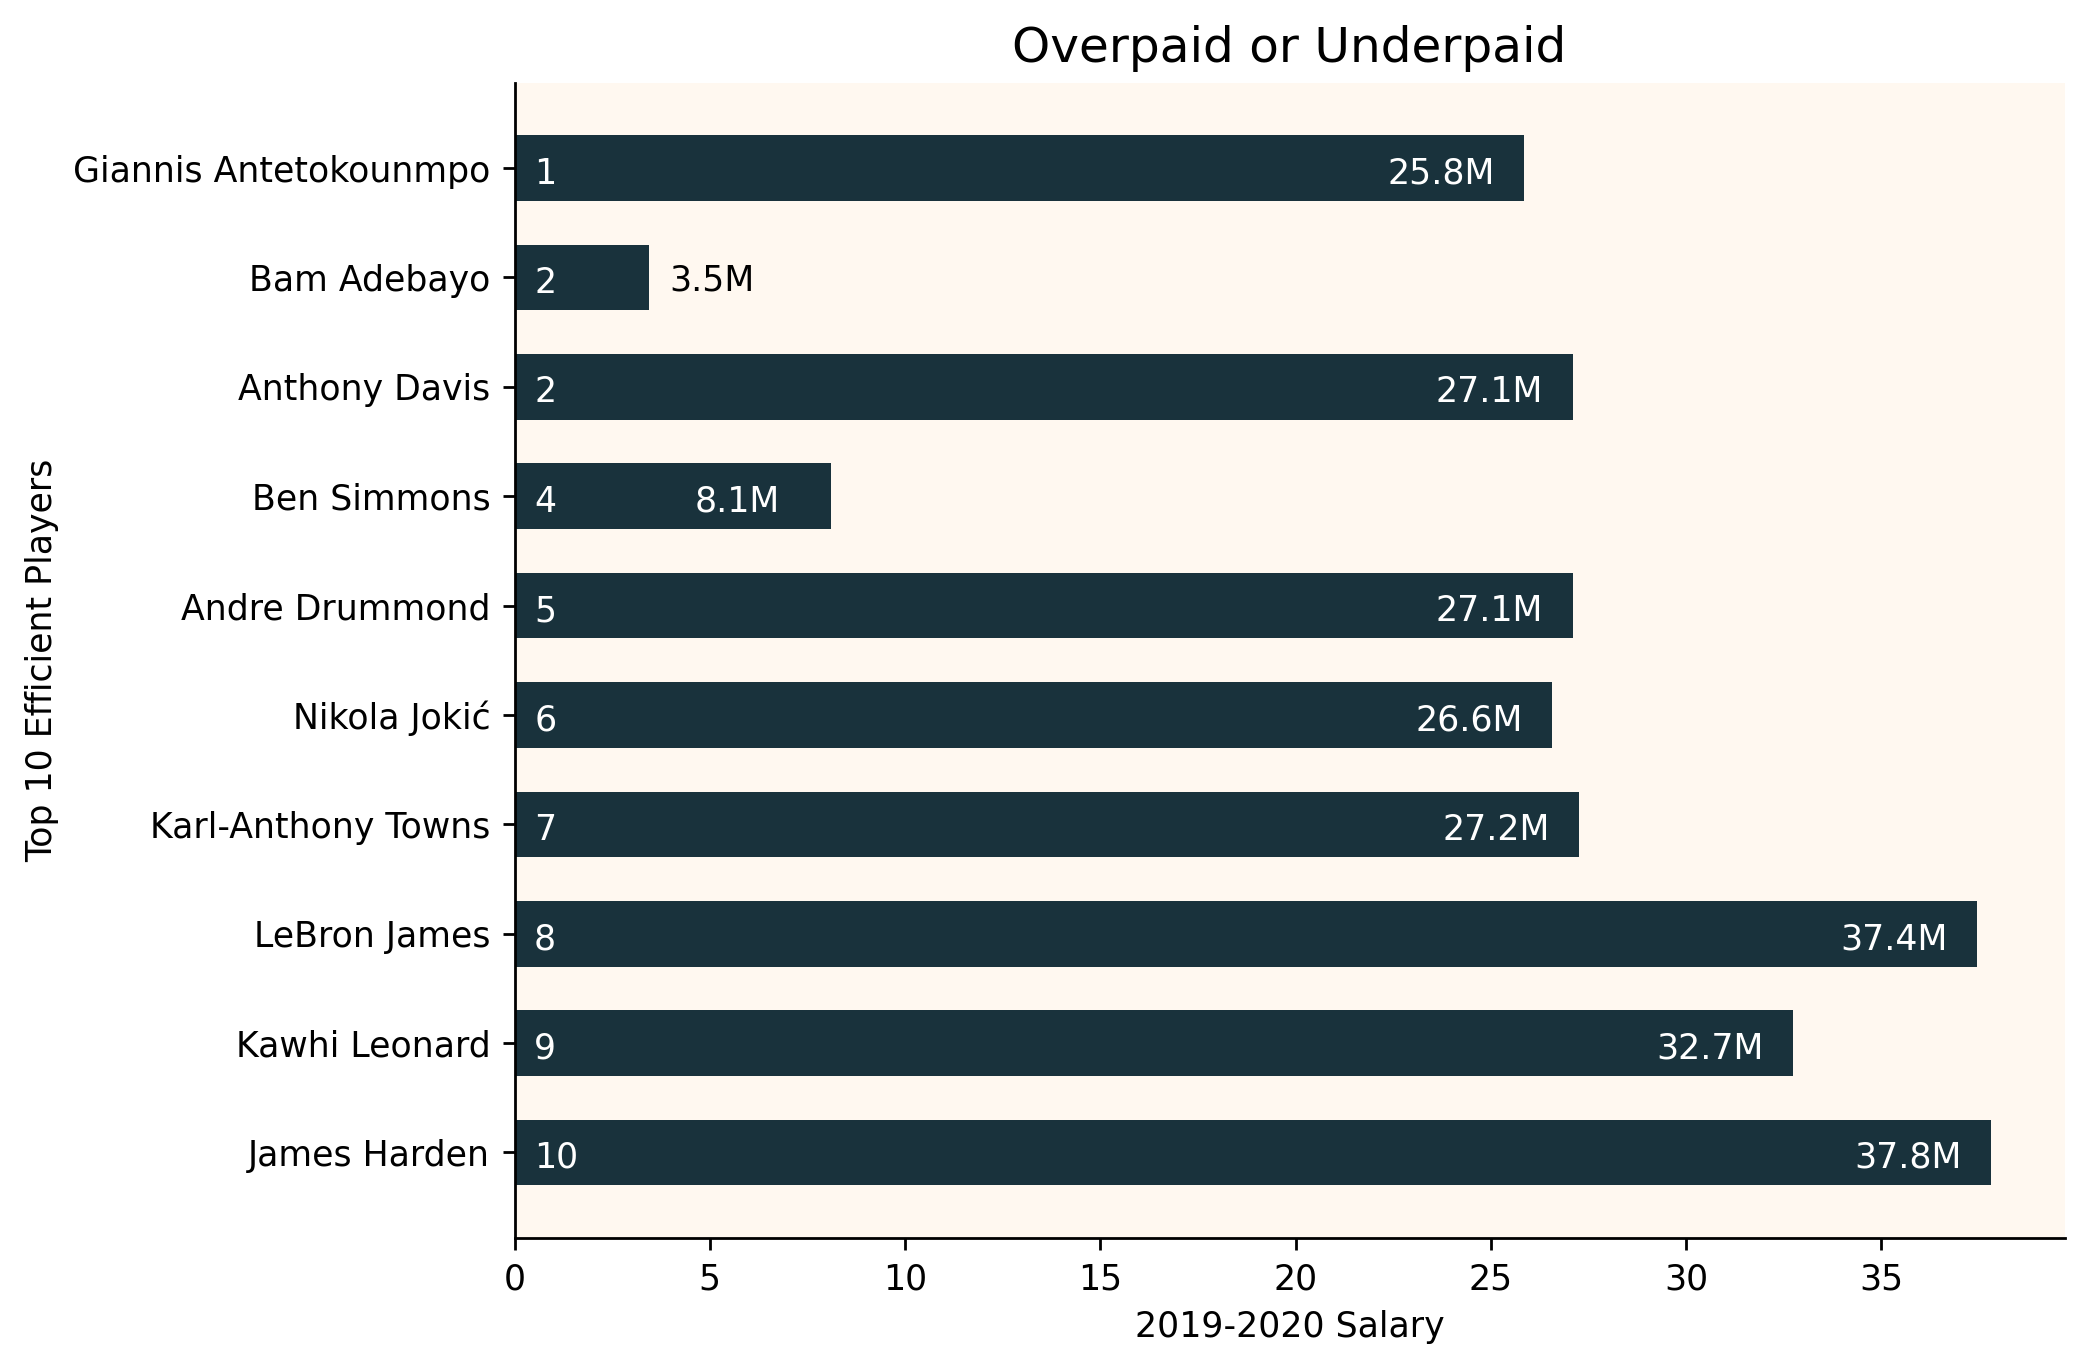

In [82]:
fig=plt.figure(figsize=(8, 6), dpi= 250, facecolor='w', edgecolor='k')
x_index = np.arange(len(dfMergeHead['PlayerName']))
# barWidth = 0.4
plt.style.use('default')

fig = plt.barh(dfMergeHead['PlayerName'], dfMergeHead['Salary2019Mil'], height=.6, color='#19323C')

# plt.barh(x_index - barWidth, dfMergeHead['Salary2019_Rank'], height=barWidth, label="Salary Rank")
# plt.barh(dfMergeHead['PlayerName'], dfMergeHead['Overall_Rank'], height=barWidth, label="Overall Rank")
plt.xlabel('2019-2020 Salary')
plt.ylabel('Top 10 Efficient Players')
plt.title('Overpaid or Underpaid', fontsize='14')
# plt.legend()


for i, v in enumerate(dfMergeHead['Salary2019Mil']):
    if v > 4:
        plt.text(v - 3.5, i + 0.05, str(round(v, 1)) + 'M', color='white', va='center')
    else:
        plt.text(v + 0.5, i + 0.025, str(round(v, 1)) + 'M', color='black', va='center')

for i, v in enumerate(dfMergeHead['Overall_Rank']):
    plt.text(.5, i + 0.05, int(v), color='white', va='center')
                

        
plt.gca().invert_yaxis()
plt.gca().set_facecolor('#FFF8F0')
plt.rcParams['grid.linestyle'] = ''
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig("output.jpg", bbox_inches='tight', facecolor=plt.gca().get_facecolor())